In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('RegressionProject_HousePrices_n4000_seed5316.csv')

we can see here that almost all our column are not null exceplt the year_renovated column and that is for the houses that are not renovated yet. we can also see the data types and the overall character for our data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             4000 non-null   int64  
 1   size_sqft         4000 non-null   int64  
 2   lot_sqft          4000 non-null   int64  
 3   bedrooms          4000 non-null   int64  
 4   bathrooms         4000 non-null   float64
 5   year_built        4000 non-null   int64  
 6   year_renovated    1255 non-null   float64
 7   renovated         4000 non-null   object 
 8   condition         4000 non-null   object 
 9   location_quality  4000 non-null   object 
 10  dist_center_km    4000 non-null   float64
 11  crime_rate        4000 non-null   float64
 12  school_rating     4000 non-null   int64  
 13  has_pool          4000 non-null   object 
 14  garage_cars       4000 non-null   int64  
 15  waterfront        4000 non-null   object 
dtypes: float64(4), int64(7), object(5)
memory 

In [5]:
pd.DataFrame(df['year_renovated'] - df['year_built'])[0].describe()

count    1255.000000
mean       13.672510
std         7.383999
min         0.000000
25%         8.000000
50%        13.000000
75%        19.000000
max        30.000000
Name: 0, dtype: float64

In [6]:
df.head()

,price,size_sqft,lot_sqft,bedrooms,bathrooms,year_built,year_renovated,renovated,condition,location_quality,dist_center_km,crime_rate,school_rating,has_pool,garage_cars,waterfront
0,18389800,2588,3901,4,4.0,2001,NaN,No,Fair,Medium,16.93,42.8,6,No,3,No
1,22831700,2363,4640,5,3.5,1997,NaN,No,Good,Medium,17.68,30.5,8,Yes,3,No
2,4196200,1050,2000,2,2.5,1961,NaN,No,Poor,Medium,24.38,37.0,7,No,0,Yes
3,124268900,3381,9221,5,4.5,1999,NaN,No,Fair,Premium,2.71,6.5,10,Yes,3,No
4,14971300,1991,6869,3,1.5,1995,NaN,No,Fair,Premium,4.55,23.4,10,No,1,No


In [7]:
df['transformed_price'] = np.log(df['price'])

In [8]:
countinous_numerical = ['price', 'size_sqft', 'lot_sqft', 'year_built',
       'dist_center_km', 'crime_rate', 'transformed_price']
discrete_numerical = ['bedrooms', 'bathrooms', 'school_rating','garage_cars']
categorical = ['renovated', 'condition','location_quality', 'has_pool', 'waterfront']
numerical = countinous_numerical + discrete_numerical

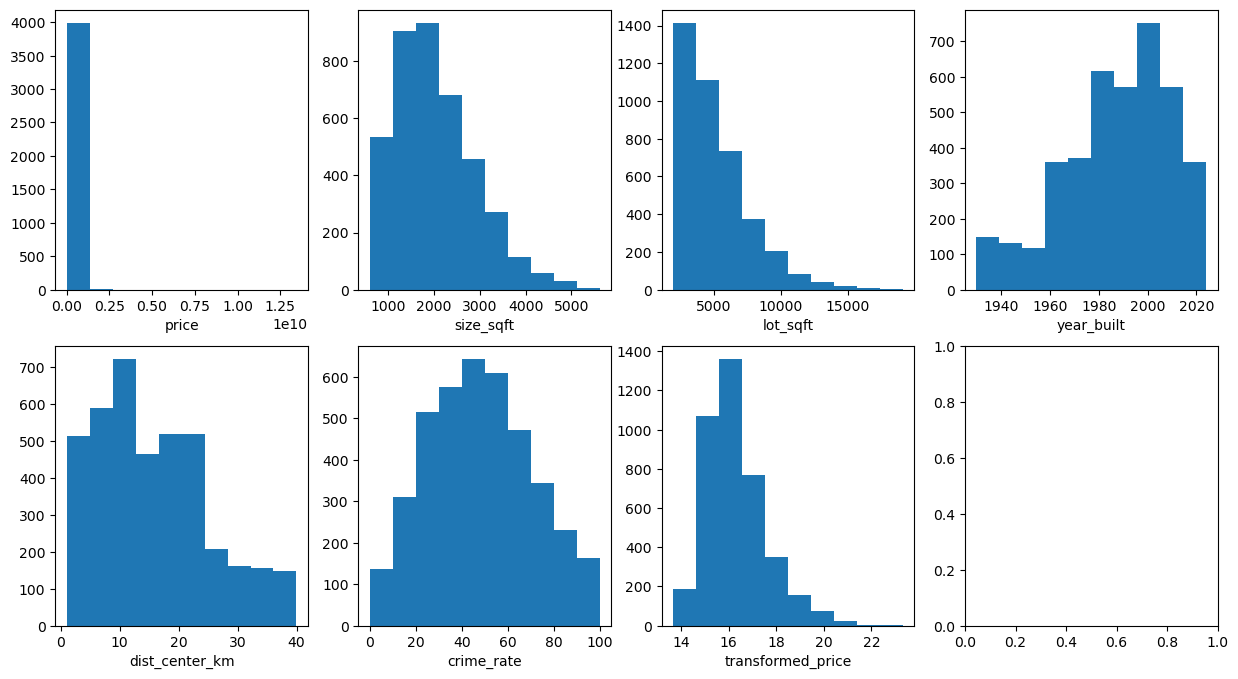

In [9]:
fig, axes = plt.subplots(2,4, figsize = (15,8))
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical].columns):
    axes[i].hist(x=cols, data=df)
    axes[i].set_xlabel(cols)
    


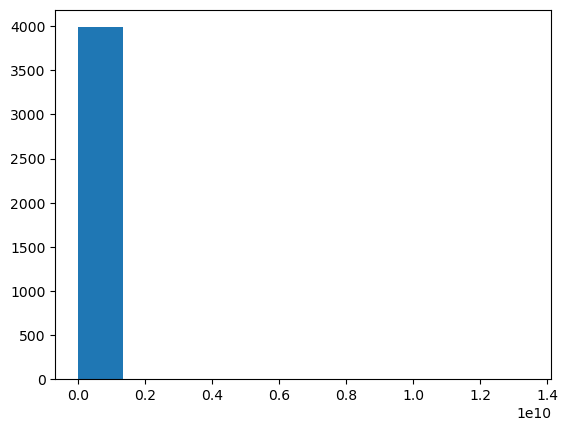

In [10]:
plt.hist(x=df['price'])
plt.show()

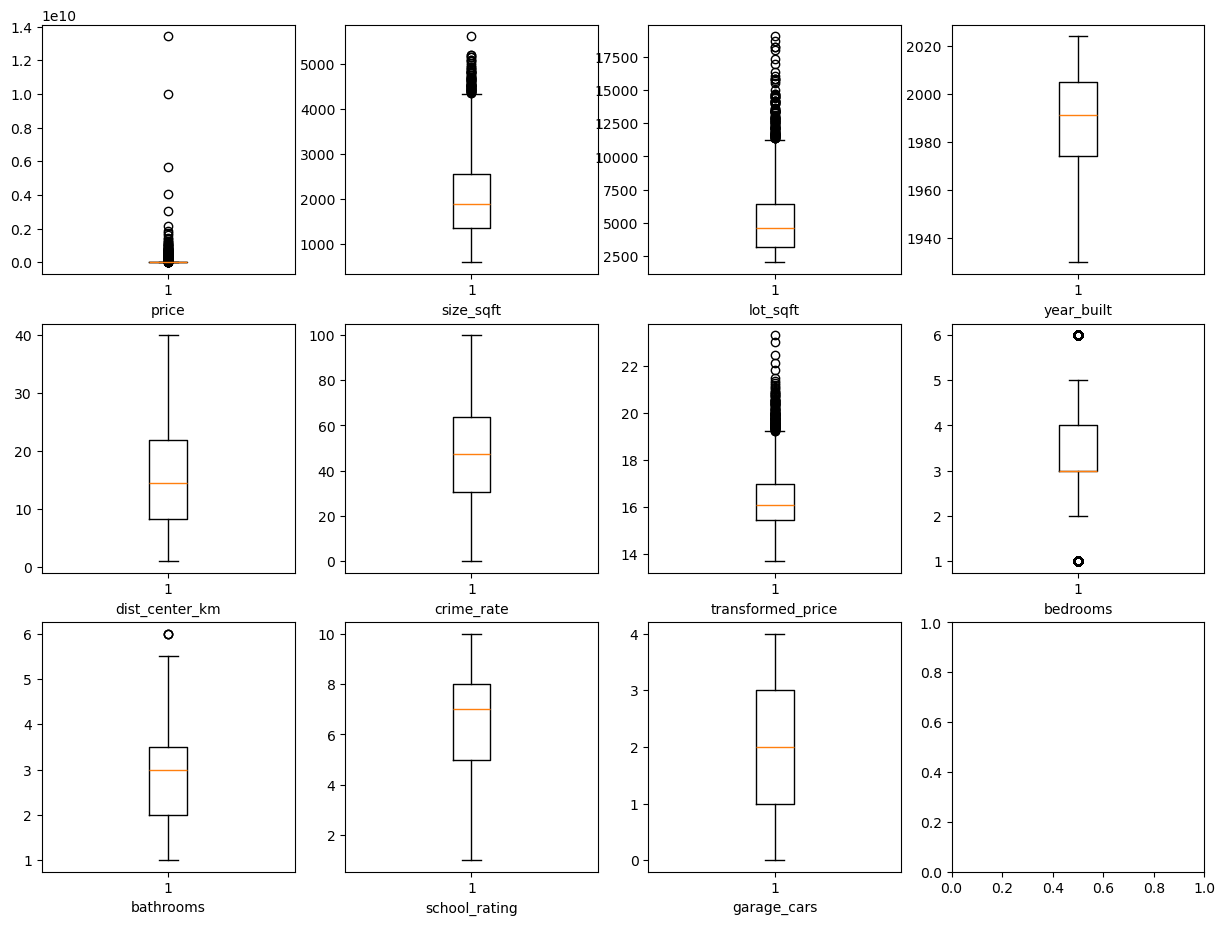

In [11]:
fig, axes = plt.subplots(3,4, figsize = (15,11))
axes =axes.ravel()
for i, cols in enumerate(df[numerical].columns):
    axes[i].boxplot(x=cols, data=df[numerical])
    axes[i].set_xlabel(cols)
    


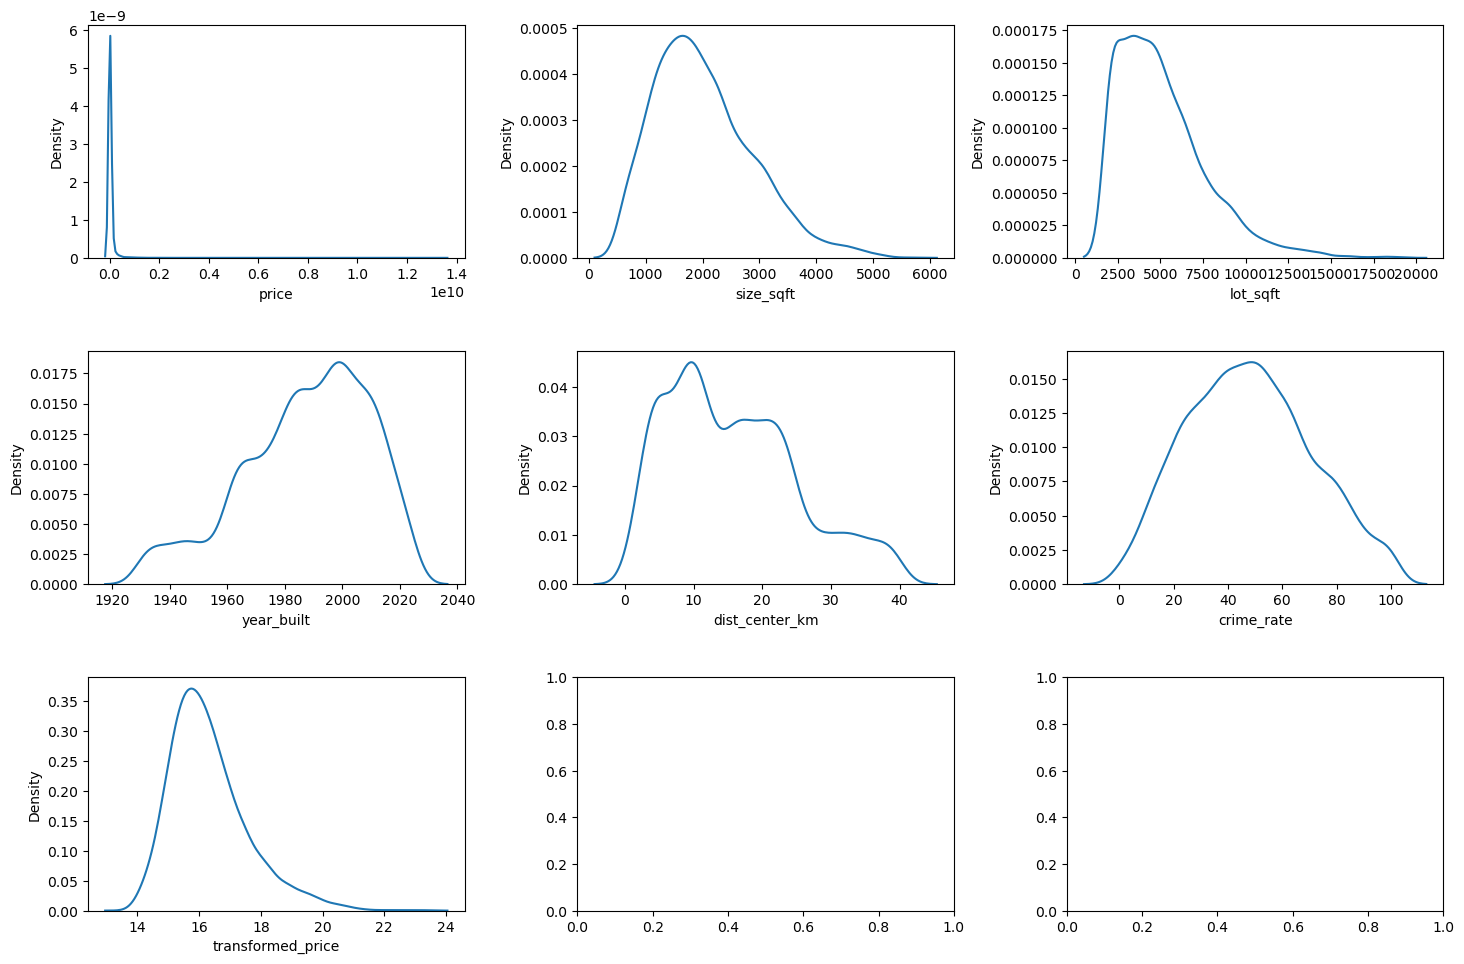

In [12]:
fig, axes = plt.subplots(3,3, figsize = (15,10))
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical].columns):
    sns.kdeplot(data=df[countinous_numerical], x=cols, ax=axes[i])
    axes[i].set_xlabel(cols)

fig.tight_layout(pad=2.0)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
    


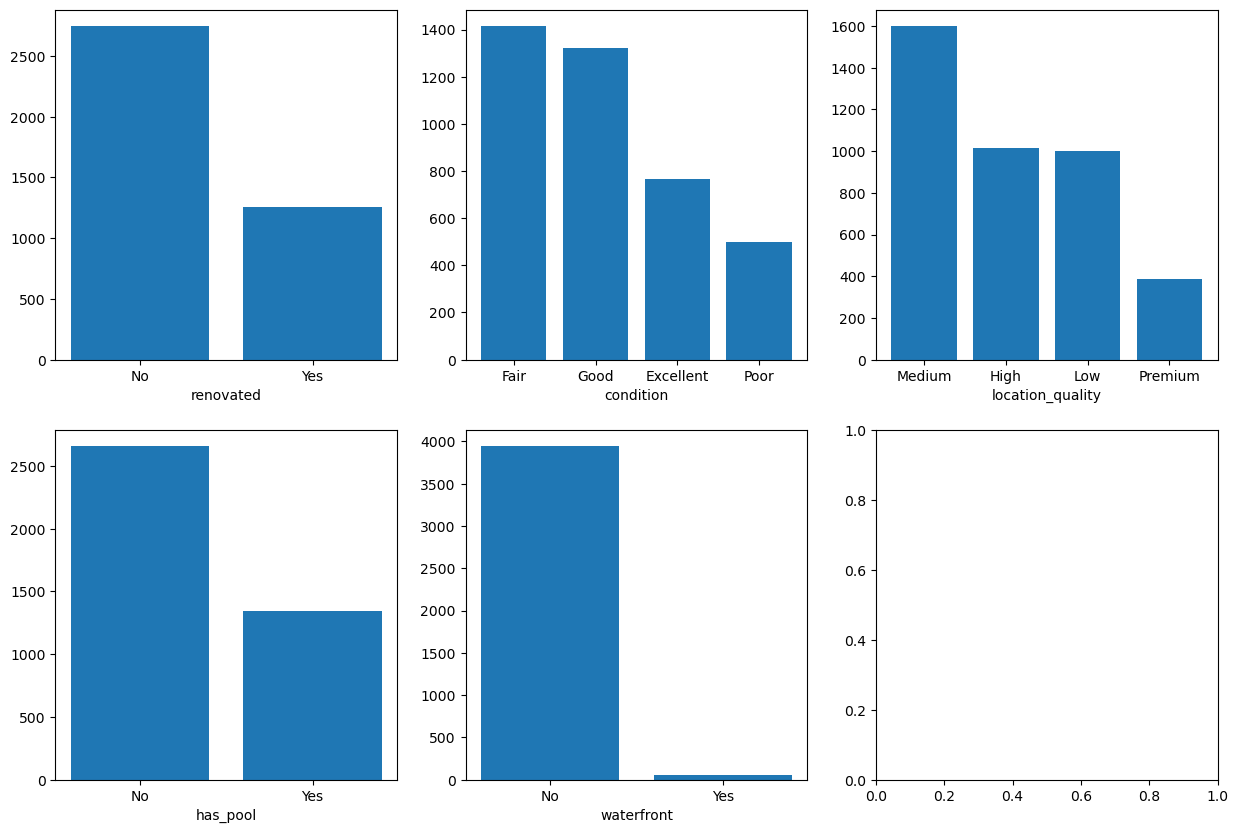

In [13]:
fig, axes = plt.subplots(2,3, figsize = (15,10))
axes =axes.ravel()
for i, cols in enumerate(df[categorical].columns):
    axes[i].bar(x=df[cols].value_counts().index, height=df[cols].value_counts().values)
    axes[i].set_xlabel(cols)

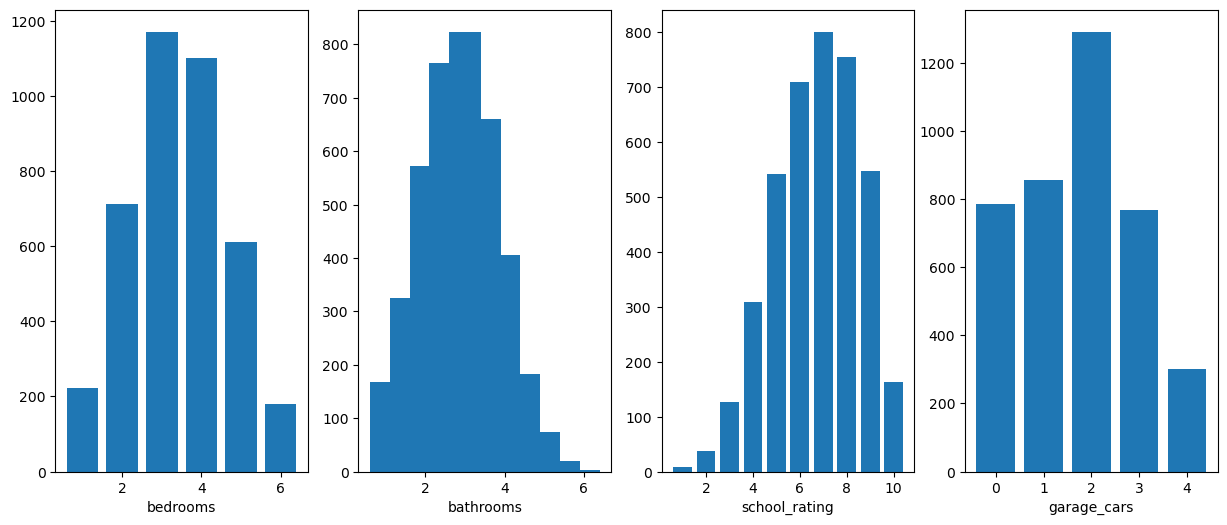

In [14]:
fig, axes = plt.subplots(1,4, figsize = (15,6))
axes =axes.ravel()
for i, cols in enumerate(df[discrete_numerical].columns):
    axes[i].bar(x=df[cols].value_counts().index, height=df[cols].value_counts().values)
    axes[i].set_xlabel(cols)

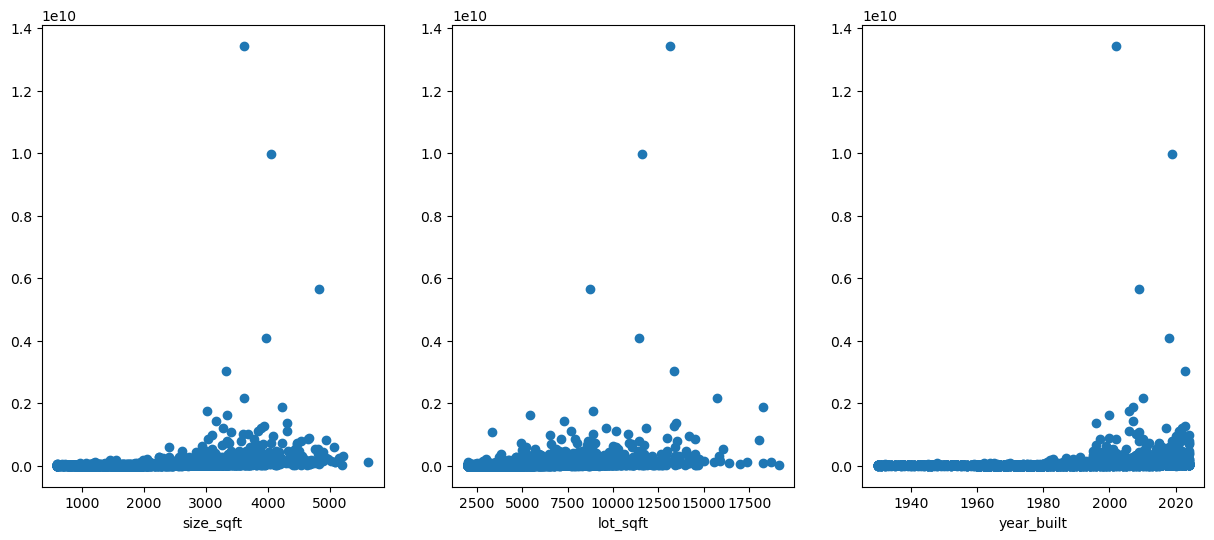

In [15]:
fig, axes = plt.subplots(1,3, figsize = (15,6))
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical[1:4]].columns):
    axes[i].scatter(x=df[cols], y=df['price'])
    axes[i].set_xlabel(cols)

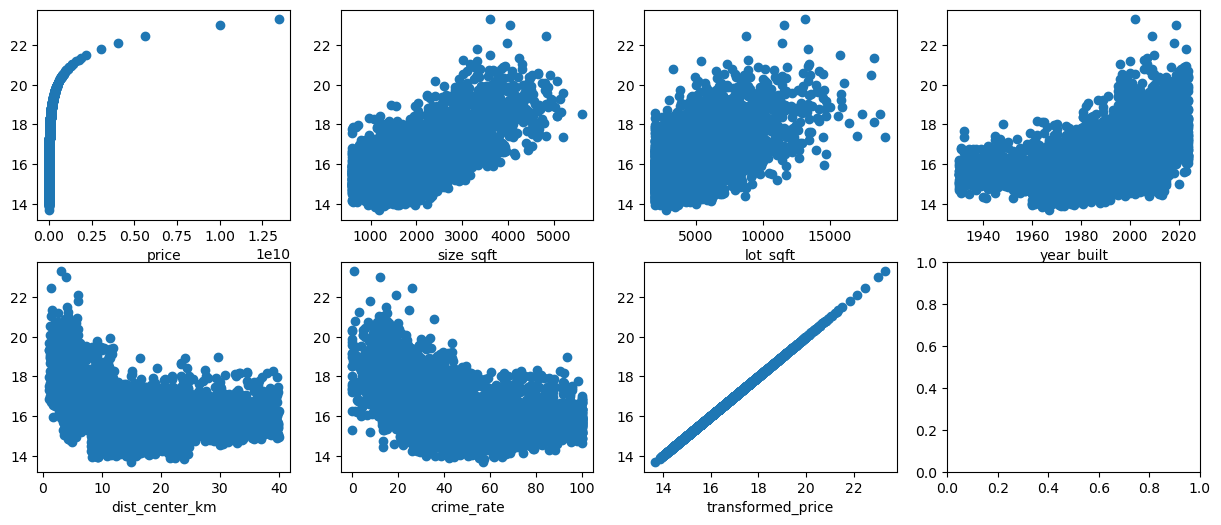

In [16]:
fig, axes = plt.subplots(2,4, figsize = (15,6))
axes =axes.ravel()
for i, cols in enumerate(df[countinous_numerical].columns):
    axes[i].scatter(x=df[cols], y=df['transformed_price'])
    axes[i].set_xlabel(cols)

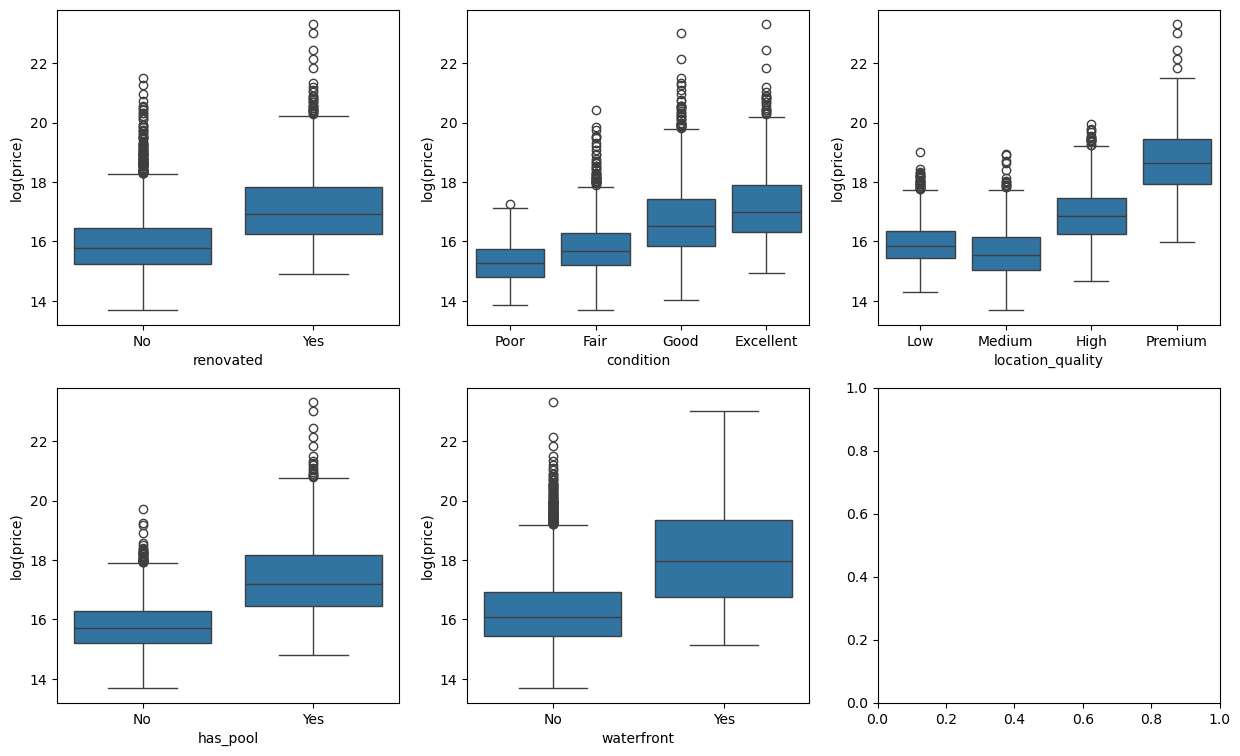

In [17]:
for col in categorical:
    df[col] = df[col].str.strip().str.title()

cond_order = ['Poor', 'Fair', 'Good', 'Excellent']
loc_order = ['Low', 'Medium', 'High', 'Premium']
renovated_order = ['No', 'Yes']
pool_order = ['No', 'Yes']
waterfront_order = ['No', 'Yes']    
df['renovated'] = df['renovated'].astype(CategoricalDtype(categories=renovated_order, ordered=True))
df['condition'] = df['condition'].astype(CategoricalDtype(categories=cond_order, ordered=True))
df['location_quality'] = df['location_quality'].astype(CategoricalDtype(categories=loc_order, ordered=True))
df['has_pool'] = df['has_pool'].astype(CategoricalDtype(categories=pool_order, ordered=True))
df['waterfront'] = df['waterfront'].astype(CategoricalDtype(categories=waterfront_order, ordered=True))

fig, axes = plt.subplots(2,3, figsize = (15,9))
axes =axes.ravel()
for i, cols in enumerate(df[categorical].columns):
    sns.boxplot(x=cols, y='transformed_price', data=df, ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('log(price)')


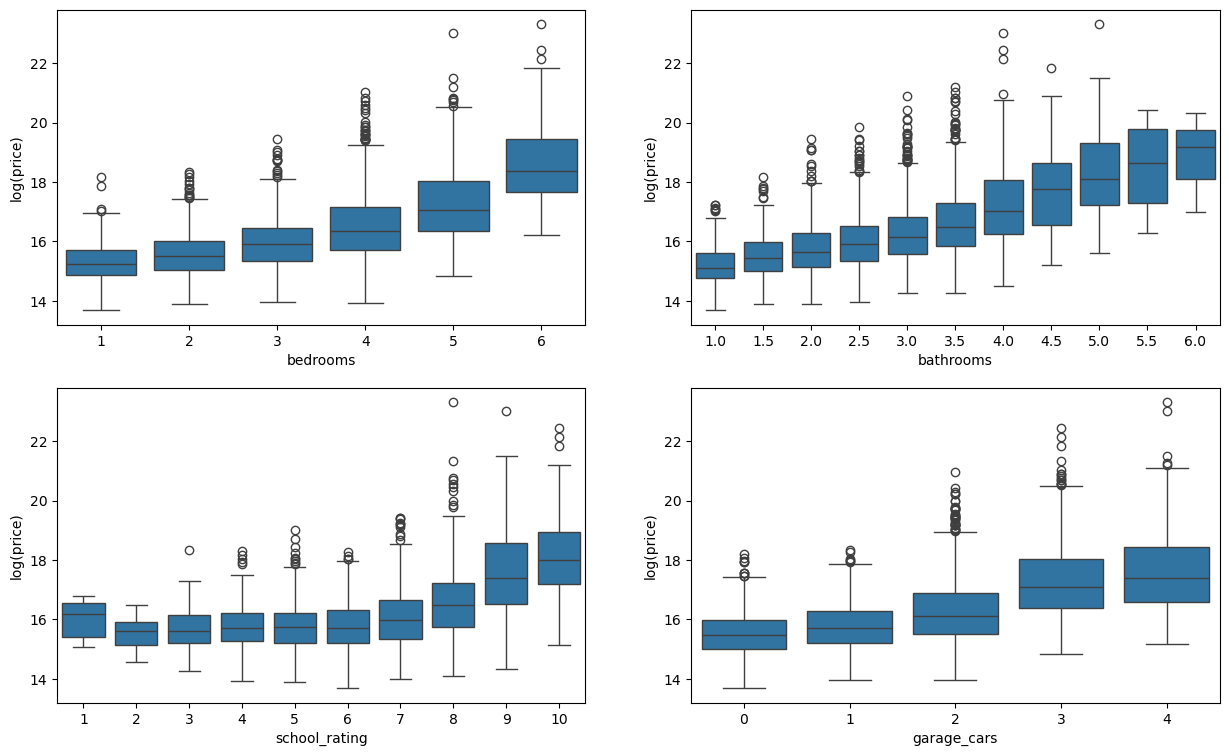

In [18]:
fig, axes = plt.subplots(2,2, figsize = (15,9))
axes =axes.ravel()
for i, cols in enumerate(df[discrete_numerical].columns):
    sns.boxplot(x=cols, y='transformed_price', data=df, ax=axes[i])
    axes[i].set_xlabel(cols)
    axes[i].set_ylabel('log(price)')

In [19]:
df[numerical].corr()

,price,size_sqft,lot_sqft,year_built,dist_center_km,crime_rate,transformed_price,bedrooms,bathrooms,school_rating,garage_cars
price,1.000000,0.218608,0.215027,0.121895,-0.137580,-0.164744,0.382340,0.171364,0.158374,0.142113,0.151004
size_sqft,0.218608,1.000000,0.816043,0.505106,-0.652350,-0.655882,0.666527,0.701484,0.535581,0.597656,0.459277
lot_sqft,0.215027,0.816043,1.000000,0.410622,-0.530869,-0.531443,0.563986,0.566906,0.425763,0.482418,0.377827
year_built,0.121895,0.505106,0.410622,1.000000,-0.589437,-0.575748,0.473249,0.350077,0.269892,0.508216,0.246225
dist_center_km,-0.137580,-0.652350,-0.530869,-0.589437,1.000000,0.723975,-0.412164,-0.463226,-0.353298,-0.661632,-0.341898
crime_rate,-0.164744,-0.655882,-0.531443,-0.575748,0.723975,1.000000,-0.490854,-0.468764,-0.356849,-0.651270,-0.337060
transformed_price,0.382340,0.666527,0.563986,0.473249,-0.412164,-0.490854,1.000000,0.576331,0.529307,0.486427,0.549767
bedrooms,0.171364,0.701484,0.566906,0.350077,-0.463226,-0.468764,0.576331,1.000000,0.766869,0.433914,0.322480
bathrooms,0.158374,0.535581,0.425763,0.269892,-0.353298,-0.356849,0.529307,0.766869,1.000000,0.344319,0.238366
school_rating,0.142113,0.597656,0.482418,0.508216,-0.661632,-0.651270,0.486427,0.433914,0.344319,1.000000,0.312111


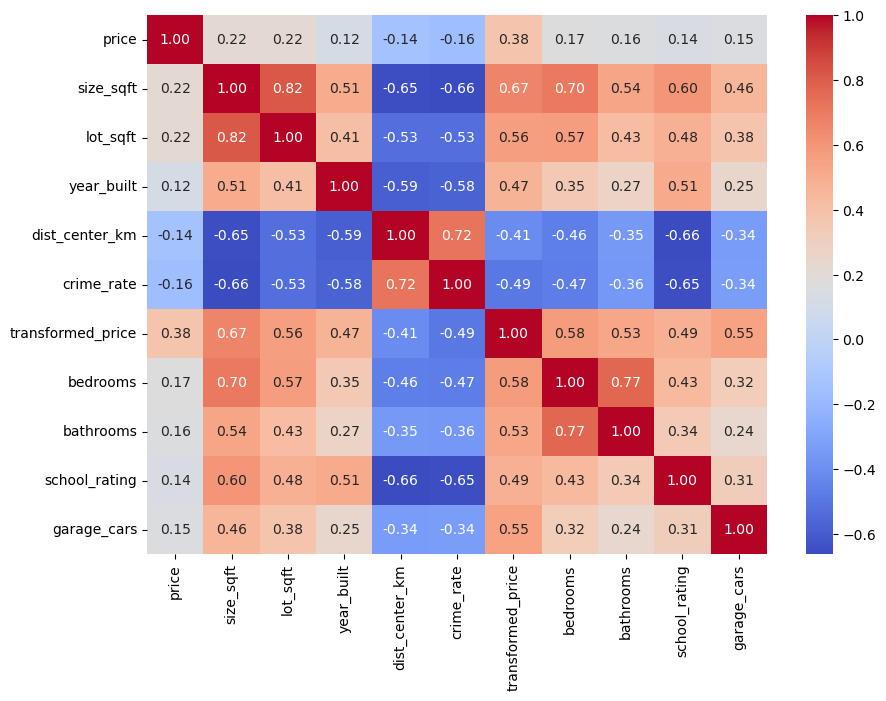

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


In [21]:
import statsmodels.api as sm

In [22]:
df_dummy = pd.get_dummies(df, drop_first=True)

In [23]:
from statsmodels.formula.api import ols
y_name = 'price'
X_names = [col for col in df_dummy.drop(columns=['transformed_price']).columns if col != y_name]

formula_str = y_name+" ~ "+" + ".join(X_names)

In [24]:
model = ols(formula=formula_str, data=df_dummy)
fitted = model.fit()

In [25]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     13.14
Date:                Sun, 28 Dec 2025   Prob (F-statistic):           7.23e-33
Time:                        17:33:11   Log-Likelihood:                -26915.
No. Observations:                1255   AIC:                         5.386e+04
Df Residuals:                    1238   BIC:                         5.395e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

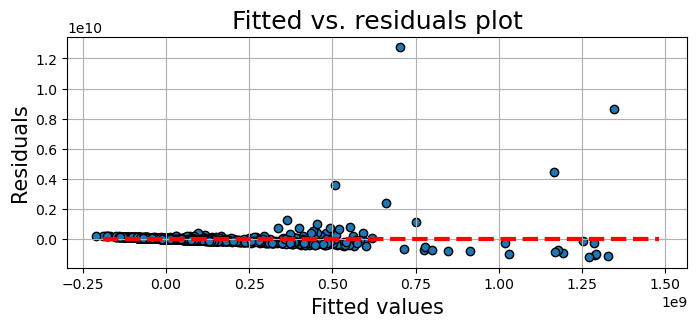

In [26]:
plt.figure(figsize=(8,3))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

here in breuschpagan test our null hyphotesis is that there is not hetroskedascity in the model and if p value is less than 0.05 that means we have to reject the null hypothesis and its an evidence for heteroskedascity

In [27]:
from statsmodels.stats.diagnostic import het_breuschpagan

\
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted.resid, fitted.model.exog)

print("Breusch-Pagan test results")
print(f"LM stat:   {lm_stat:.4f}")
print(f"LM p-value:{lm_pvalue:.4e}")
print(f"F stat:    {f_stat:.4f}")
print(f"F p-value: {f_pvalue:.4e}")


Breusch-Pagan test results
LM stat:   48.7238
LM p-value:2.0147e-04
F stat:    3.1253
F p-value: 2.9643e-05


In [40]:
from scipy.stats import boxcox

y_bc, lambda_hat = boxcox(df_dummy['price'])
df_dummy['price_boxcox'] = y_bc  
df_dummy = df_dummy.rename(columns={'transformed_price':'price_log'})

print("Estimated lambda:", lambda_hat)


Estimated lambda: -0.2719136020513787


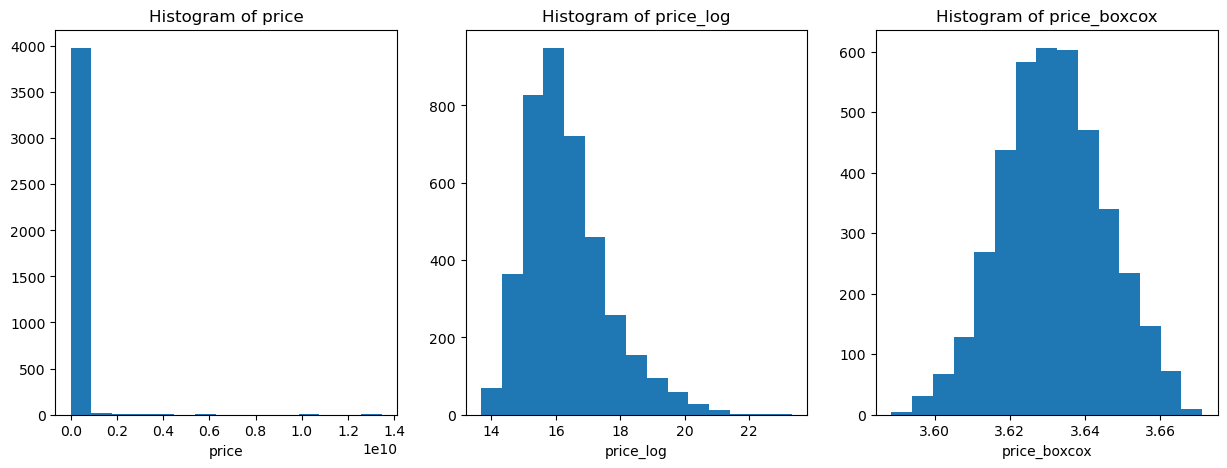

In [41]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
axes = axes.ravel()
for i, col in enumerate(['price', 'price_log', 'price_boxcox']):
    axes[i].hist(df_dummy[col], bins=15)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)

In [48]:
y_name_boxcox = 'price_boxcox'
y_name_log = 'price_log'

X_names = [col for col in df_dummy.columns if col not in ['price', 'price_boxcox', 'price_log']]
formula_boxcox = y_name_boxcox + ' ~ ' + ' + '.join(X_names)
formula_log = y_name_log + ' ~ ' + ' + '.join(X_names)


In [49]:
formula_log

'price_log ~ size_sqft + lot_sqft + bedrooms + bathrooms + year_built + year_renovated + dist_center_km + crime_rate + school_rating + garage_cars + renovated_Yes + condition_Fair + condition_Good + condition_Excellent + location_quality_Medium + location_quality_High + location_quality_Premium + has_pool_Yes + waterfront_Yes'

In [50]:
model_log = ols(formula=formula_log, data=df_dummy)
fitted_log = model_log.fit()
print(fitted_log.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     309.5
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:01:34   Log-Likelihood:                -1083.1
No. Observations:                1255   AIC:                             2200.
Df Residuals:                    1238   BIC:                             2288.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [54]:
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted_log.resid, fitted_log.model.exog)

print("Breusch-Pagan test results for log transformation model")
print(f"LM stat:   {lm_stat}")
print(f"LM p-value:{lm_pvalue}")
print(f"F stat:    {f_stat}")
print(f"F p-value: {f_pvalue}")


Breusch-Pagan test results for log transformation model
LM stat:   244.17953699480483
LM p-value:4.659156964563289e-41
F stat:    18.691144833774427
F p-value: 5.4428155891713965e-48


In [51]:
model_boxcox = ols(formula=formula_boxcox, data=df_dummy)
fitted_boxcox = model_boxcox.fit()
print(fitted_boxcox.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     341.1
Date:                Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:01:57   Log-Likelihood:                 4913.7
No. Observations:                1255   AIC:                            -9793.
Df Residuals:                    1238   BIC:                            -9706.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [55]:
lm_stat, lm_pvalue, f_stat, f_pvalue = het_breuschpagan(fitted_boxcox.resid, fitted_boxcox.model.exog)

print("Breusch-Pagan test results for boxcox transformation model")
print(f"LM stat:   {lm_stat}")
print(f"LM p-value:{lm_pvalue}")
print(f"F stat:    {f_stat}")
print(f"F p-value: {f_pvalue}")


Breusch-Pagan test results for boxcox transformation model
LM stat:   28.261421437172647
LM p-value:0.07852510200457277
F stat:    1.7825537746298579
F p-value: 0.028656390444521174
